In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
import sklearn

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


# An Introduction to Neural Nets

### This notebook

In this notebook, we'll cover the two important "ingredients" of Neural Networks:
1. Layers
2. Activation functions

Note: We will use the keras library for demonstration, but it's not meant to be explained here. That will come at the end of today's lesson. For now, try to focus on the theoretical topics we're discussing.

## XOR

The XOR problem is a classic problem in machine learning. This problem asks a model to learn the XOR logical function reproduced below

X | Y | XOR
---|---|---
0 | 0 | 0
1 | 0 | 1
0 | 1 | 1
1 | 1 | 0

Question: Do you think this could be solved with logistic regression? Why or why not?

Answer: Logistic regression wouldn't be a good model for this because the XOR function is nonlinear.

## Back up: the problem of nonlinear data.

To get started discussing neural nets, we'll return to the problem discussed in [Model Linearity](../project-03/model-linearity) lesson: how do we get our models to learn nonlinear functions?

The data below is a cluster version of the XOR problem

Text(0.5, 1.0, 'Non-Separable clusters')

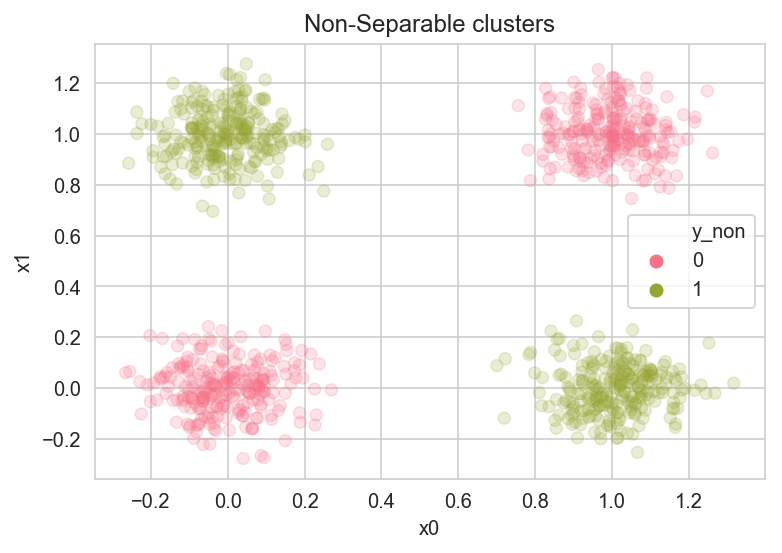

In [2]:
from sklearn import datasets

pal = dict(enumerate(sns.color_palette("husl", 4)))

x, y = datasets.make_blobs(n_samples=1000, n_features=2,
                           centers=[[0, 0], [0, 1], [1, 0],
                                    [1, 1]], cluster_std=.1, random_state=0)

blob_df = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "y": y})

blob_df["y_non"] = blob_df.y.isin([1, 2]).astype("int")

sns.scatterplot(x="x0", y="x1", hue="y_non", data=blob_df, alpha=.2,
                edgecolor=None, palette=pal)
title("Non-Separable clusters")

In [3]:
from sklearn import metrics


def plot_decision_boundary(pred_func, x, y, ax=None, points=1e3, pal=pal,
                           margin_func=None, alpha=.2):
    """Plots the decision boundary for a function that generates a prediction.

    Args:
        pred_func (function): Function that returns integer category labels for `x`.
        x (array): [2 x n] array.
        y (array): any-dimensional array (will be flattened)
        ax (axis): matplotlib axis. None generates our own.
        points (floatlike): number of points we wish to generate
        pal: pallete of colors for each class label
        margin_func: optional function for generating margins (drawn at margin = ±1)
        alpha: transparency of scatterplot points

    Returns:
        None
    """
    if ax is None:
        fig, ax = subplots()

    y_pred = pred_func(x)
    score = metrics.accuracy_score(y_pred.flatten(), y.flatten())

    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, alpha=alpha, edgecolor=None,
                    palette=pal, ax=ax)

    side_pts = int(sqrt(points))

    x0_min, x0_max = ax.get_xlim()
    x1_min, x1_max = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(x0_min, x0_max, num=side_pts),
        np.linspace(x1_min, x1_max, num=side_pts))

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.text((x0_min + x0_max)/2, x1_min + (x1_max - x1_min)*.1,
            f"acc: {score:.1%}", bbox=dict(boxstyle="round", fc="white",
                                           ec="black"))

    ax.contourf(xx, yy, Z, alpha=0.2, colors=list(pal.values()), zorder=-1)

    if not (margin_func is None):
        Z = margin_func(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # plot decision boundary and margins
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 1], alpha=0.5,
                   linestyles=['--', '--'], zorder=0)

We'll start with a review of where Support Vector Machines leave off. The first step is to build a Support Vector Machine that we can train with keras. We'll cover what each step does in more detail momentarily. For now, the important parts are:

The linear function $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ is executed by `keras.layers.Dense`. 

Keras has to initialize a weight matrix $\mathbf{w}$ before it sees our data, so we have to specify the dimensionality. We specify our output dimensionality with `units=1` and our input dimensionality with `input_shape=(2, )`. As a result, it knows that the weight matrix should be $[2 \times 1]$.

Here, the SVM loss is specified by `loss="categorical_hinge"`, and we're using vanilla stochastic gradient descent to fit the model.

By now you should be able to guess how the model will do on this dataset.

In [76]:
import keras

svm_keras = keras.Sequential([keras.layers.Dense(units=1, input_shape=(2, ))])

svm_keras.compile(optimizer="sgd", loss="categorical_hinge")

svm_keras.fit(x=blob_df[["x0", "x1"]], y=blob_df["y_non"], epochs=20)

Epoch 1/20
1000/1000 [==============================] - 1s 570us/step - loss: 1.0535
Epoch 2/20
1000/1000 [==============================] - 0s 68us/step - loss: 1.0195
Epoch 3/20
1000/1000 [==============================] - 0s 59us/step - loss: 1.0084
Epoch 4/20
1000/1000 [==============================] - 0s 69us/step - loss: 1.0047
Epoch 5/20
1000/1000 [==============================] - 0s 65us/step - loss: 1.0032
Epoch 6/20
1000/1000 [==============================] - 0s 46us/step - loss: 1.0023
Epoch 7/20
1000/1000 [==============================] - 0s 58us/step - loss: 1.0019
Epoch 8/20
1000/1000 [==============================] - 0s 63us/step - loss: 1.0016
Epoch 9/20
1000/1000 [==============================] - 0s 60us/step - loss: 1.0014
Epoch 10/20
1000/1000 [==============================] - 0s 57us/step - loss: 1.0012
Epoch 11/20
1000/1000 [==============================] - 0s 76us/step - loss: 1.0012
Epoch 12/20
1000/1000 [==============================] - 0s 62us/step - l

## Back to Square one

Okay, we're back to square one with using a linear classifier on nonlinear data. It doesn't work! 

**Recall**: How did we fix this for SVMs previously?

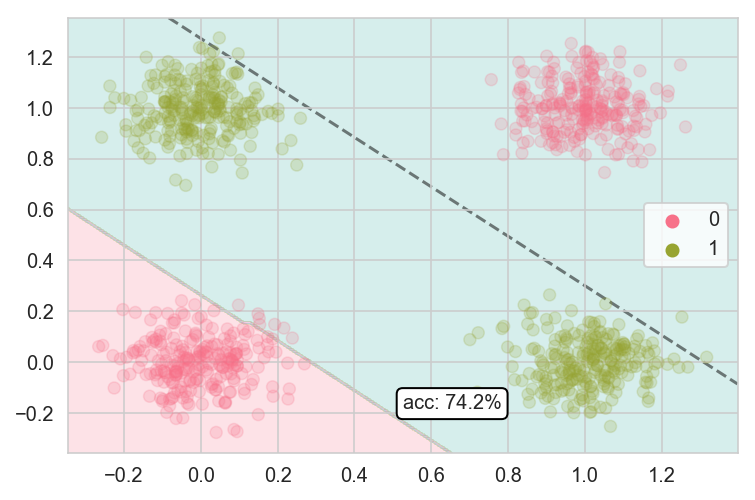

In [78]:
pred_func = lambda x: svm_keras.predict(x) > 0

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e4,
                       margin_func=svm_keras.predict)

## Back to Square one

**Recall**: How did we fix this for SVMs previously?
    
**Answer**: We used kernels. For an SVM with SGD, we used kernel approximation because the kernel trick doesn't work with SGD. Let's confirm that this still works in our case

In [79]:
from sklearn import kernel_approximation

N_COMP = 50

x = blob_df[["x0", "x1"]].values

kernel_approx = kernel_approximation.Nystroem(n_components=N_COMP, gamma=2)

x_rbf = kernel_approx.fit_transform(x)

svm_keras = keras.Sequential(
    [keras.layers.Dense(units=1, input_shape=(N_COMP, ))])

svm_keras.compile(optimizer="sgd", loss="categorical_hinge")

svm_keras.fit(x=x_rbf, y=blob_df["y_non"], epochs=20)

Epoch 1/20
1000/1000 [==============================] - 0s 397us/step - loss: 0.8889
Epoch 2/20
1000/1000 [==============================] - 0s 77us/step - loss: 0.8357
Epoch 3/20
1000/1000 [==============================] - 0s 75us/step - loss: 0.7825
Epoch 4/20
1000/1000 [==============================] - 0s 65us/step - loss: 0.7291
Epoch 5/20
1000/1000 [==============================] - 0s 68us/step - loss: 0.6757
Epoch 6/20
1000/1000 [==============================] - 0s 60us/step - loss: 0.6224
Epoch 7/20
1000/1000 [==============================] - 0s 49us/step - loss: 0.5690
Epoch 8/20
1000/1000 [==============================] - 0s 60us/step - loss: 0.5157
Epoch 9/20
1000/1000 [==============================] - 0s 70us/step - loss: 0.4624
Epoch 10/20
1000/1000 [==============================] - 0s 80us/step - loss: 0.4107
Epoch 11/20
1000/1000 [==============================] - 0s 70us/step - loss: 0.3630
Epoch 12/20
1000/1000 [==============================] - 0s 95us/step - l

Okay, so kernel approximation still works.

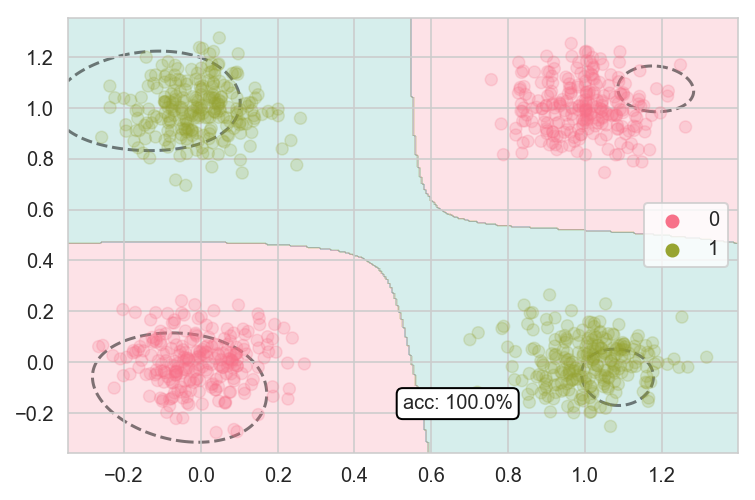

In [80]:
pred_func = lambda x: svm_keras.predict(kernel_approx.transform(x)) > 0
margin_func = lambda x: svm_keras.predict(kernel_approx.transform(x))

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e5,
                       margin_func=margin_func)

# The deep learning approach

This sets the stage for us to discuss the Deep Learning approach. In a few words

**Traditional Machine Learning**: Use kernels, feature extraction and engineering, and hand prep of data to process inputs into a form that is better for off-the-shelf models.

**Deep Learning**: Minimal prep of input data. Set up your model so that it *is able to* learn the sorts of transformations needed to best use the data. Then let your model do the rest.

In general, the deep learning approach leads to a lot more tinkering *with the structure of the model* and a lot less tinkering with your data. The power of this approach is that the processing steps are learned by the model based on the training data and and task. In many cases, this learned processing pipeline can outperform anything humans have been able to come up with by hand.

## The deep learning approach: what's the catch?

This little statement "set up your model so that it is able to learn the sorts of transformations needed to best use the data" is much easier said than done. 

In fact, in a typical deep learning project, much of the work is in finding the best architectures and modifications. 

# The deep learning approach: ingredients

The success of neural networks is due to two essential ingredients:
    1. Layers
    2. Activations

# Ingredient 1: Layers

The first ingredient is *layers*. The insight of neural nets is that we can use this function several times in a sequence. In this case, every application of our linear function is called a "layer". Below we have $n$ layers and at the very end, we'll use $\hat{\mathbf{y}} = \mathbf{h}_n$ as our estimate of our outputs:

$$\mathbf{h}_1 = \mathbf{w}_1^\top \mathbf{x} + b_1$$
$$\mathbf{h}_2 = \mathbf{w}_2^\top \mathbf{h}_1 + b_2$$
$$\dots$$
$$\mathbf{h}_n = \mathbf{w}_n^\top \mathbf{h}_{n-1} + b_n$$

Now, $\mathbf{h}_1$ is a <u>**hidden layer**</u>—a layer whose output is not used directly for prediction. 

## Why layers?

Using several layers allows the model to learn how to transform and extract valuable information from the input data and then to use that newly transformed and extracted information to perform some task, like classification or regression.  

Before Deep Learning, these are steps that were typically performed ahead of time, or using kernels. 

Okay, let's revisit that non-separable blob dataset but this time, we'll see how this would be solved with deep learning.

Text(0.5, 1.0, 'Non-Separable clusters')

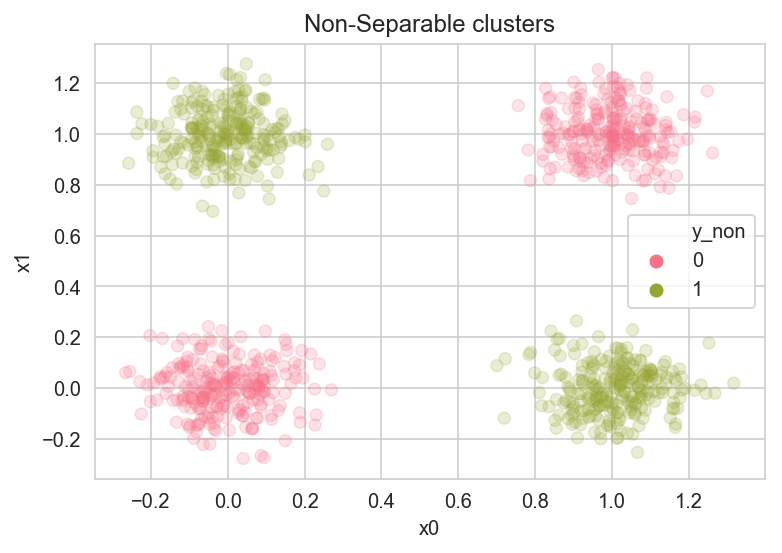

In [81]:
sns.scatterplot(x="x0", y="x1", hue="y_non", data=blob_df, alpha=.2,
                edgecolor=None, palette=pal)
title("Non-Separable clusters")

In the code below, we're adding a second layer with 10 units. This is a relatively shallow network described by the following equation

$$\mathbf{h}_1 = \mathbf{w}_1^\top \mathbf{x} + b_1$$
$$\hat{\mathbf{y}} = \mathbf{w}_2^\top \mathbf{h}_1 + b_2$$.


In [82]:
from sklearn import kernel_approximation

svm_keras = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(2, )),
    keras.layers.Dense(units=1)
])

svm_keras.compile(optimizer="sgd", loss="categorical_hinge")

svm_keras.fit(x=blob_df[["x0", "x1"]], y=blob_df["y_non"], epochs=50)

Epoch 1/50
1000/1000 [==============================] - 0s 443us/step - loss: 1.0025
Epoch 2/50
1000/1000 [==============================] - 0s 87us/step - loss: 1.0024
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 1.008 - 0s 73us/step - loss: 1.0025
Epoch 4/50
1000/1000 [==============================] - 0s 69us/step - loss: 1.0027
Epoch 5/50
1000/1000 [==============================] - 0s 51us/step - loss: 1.0023
Epoch 6/50
1000/1000 [==============================] - 0s 56us/step - loss: 1.0020
Epoch 7/50
1000/1000 [==============================] - 0s 66us/step - loss: 1.0025
Epoch 8/50
1000/1000 [==============================] - 0s 72us/step - loss: 1.0022
Epoch 9/50
1000/1000 [==============================] - 0s 80us/step - loss: 1.0021
Epoch 10/50
1000/1000 [==============================] - 0s 96us/step - loss: 1.0021
Epoch 11/50
1000/1000 [==============================] - 0s 66us/step - loss: 1.0020
Epoch 12/50
1000/1000 [==========================

As you can clearly see, layers alone are not enough.

/Users/s/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


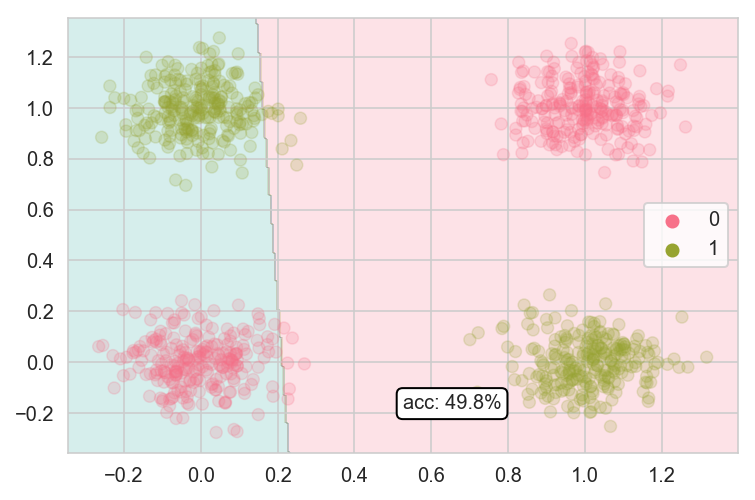

In [83]:
pred_func = lambda x: svm_keras.predict(x) > 0

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e5,
                       margin_func=svm_keras.predict)

## Ingredient 2: a nonlinear activation function

Can you spot the problem with the previous model?

When linear functions are combined, the result is still limited to being a linear function. 

In other words, combining layers of linear functions will never allow our model to learn something nonlinear.

We can fix this with a nonlinear activation function $f_a$.

$$\mathbf{h}_1 = f_a(\mathbf{w}_1^\top \mathbf{x} + b_1)$$
$$\hat{\mathbf{y}} = \mathbf{w}_2^\top \mathbf{h}_1 + b_2$$

![](activations/tanh.png)

Specifically, we'll use the tanh activation function $f_a(\mathbf{x}) = \tanh(\mathbf{x}) $

The addition of a nonlinear activation function allows the model to learn to process input in a nonlinear fashion, which is essential for classifying datasets like our blob dataset. 

In [85]:
# Note, the below cell is VERY sensitive to the random seed
# running it with a different seed is likely to result in unsuccessful training
# it an be made more stable by increasing the number of hidden units
# but we'll leve it at units=2 for visualization

from numpy.random import seed
from tensorflow import set_random_seed

In [86]:
SEED = 1
seed(SEED)
set_random_seed(SEED)

svm_keras = keras.Sequential([
    keras.layers.Dense(units=2, input_shape=(2, ), name="hidden_layer"),
    keras.layers.Activation("relu", name="hidden_activation"),
    keras.layers.Dense(units=1, name="output_layer")
])

svm_keras.compile(optimizer="sgd", loss="categorical_hinge")

svm_keras.fit(x=blob_df[["x0", "x1"]], y=blob_df["y_non"], batch_size=8,
              epochs=50)

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0476
Epoch 2/50
1000/1000 [==============================] - 0s 165us/step - loss: 0.9595
Epoch 3/50
1000/1000 [==============================] - 0s 170us/step - loss: 0.9143
Epoch 4/50
1000/1000 [==============================] - 0s 187us/step - loss: 0.8437
Epoch 5/50
1000/1000 [==============================] - 0s 184us/step - loss: 0.7707
Epoch 6/50
1000/1000 [==============================] - 0s 185us/step - loss: 0.7152
Epoch 7/50
1000/1000 [==============================] - 0s 174us/step - loss: 0.6710
Epoch 8/50
1000/1000 [==============================] - 0s 166us/step - loss: 0.6325
Epoch 9/50
1000/1000 [==============================] - 0s 188us/step - loss: 0.5972
Epoch 10/50
1000/1000 [==============================] - 0s 211us/step - loss: 0.5633
Epoch 11/50
1000/1000 [==============================] - 0s 303us/step - loss: 0.5285
Epoch 12/50
1000/1000 [==============================] - 0s 217us

We did it!

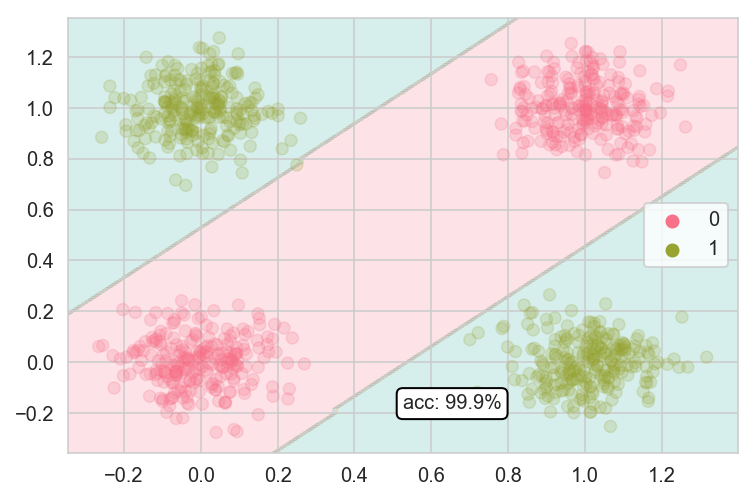

In [87]:
pred_func = lambda x: svm_keras.predict(x) > 0

plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values,
                       y=blob_df["y_non"].values, points=1e4)

How'd we do it? Let's look at a few test points to see. 

In [88]:
def quick_scatter(x, y, ax, alpha=1):
    """Quick function for making a scatter plot of x.

    Args:
        x: array of inputs
        y: categorical outputs
        ax: axis to plot on
        alpha (float): transparency of points 

    Returns:
        None
    """
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, edgecolor=None, palette=pal,
                    legend=False, alpha=alpha, ax=ax)


def quick_arrows(x1, x2, ax):
    """Quick function to draw arrows from x1 -> x2.

    Args:
        x1: array of inputs
        x2: another array of inputs
        ax: axis to draw on

    Returns:
        None
    """
    for i in range(x1.shape[0]):
        ax.annotate("", x1[i, :], x2[i, :],
                    arrowprops=dict(arrowstyle="<-", color="black"))

In [ ]:
x_test = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y_test = np.array([0, 0, 1, 1])

In [63]:
# grab output of first hidden layer
hidden_layer_model = keras.Model(
    inputs=svm_keras.input, outputs=svm_keras.get_layer("hidden_layer").output)
x_h = hidden_layer_model.predict(x_test)

# grab output of after activation
hidden_act_model = keras.Model(
    inputs=svm_keras.input,
    outputs=svm_keras.get_layer("hidden_activation").output)
x_a = hidden_act_model.predict(x_test)

# grab prediction function from final layer
last_input = keras.Input(shape=(2, ))
last_output = svm_keras.get_layer("output_layer")(last_input)
last_layer_model = keras.Model(inputs=last_input, outputs=last_output)
last_pred = lambda x: last_layer_model.predict(x) > 0

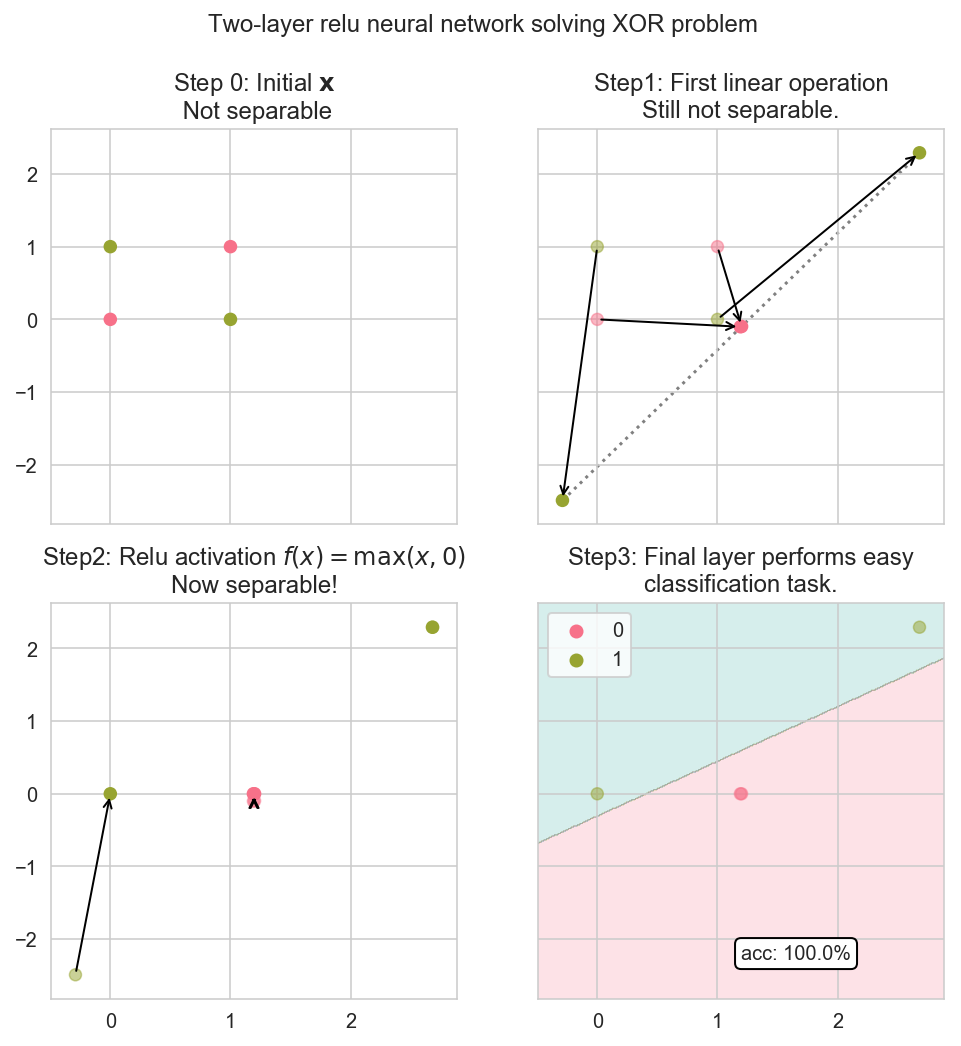

In [75]:
fig, axes = subplots(ncols=2, nrows=2, figsize=(8, 8), sharex=True,
                     sharey=True)
axes = axes.flatten()
quick_scatter(x_test, y_test, axes[0])

axes[0].set_title("Step 0: Initial $\mathbf{x}$\n Not separable")

quick_scatter(x_test, y_test, axes[1], alpha=.5)
quick_scatter(x_h, y_test, axes[1])
quick_arrows(x_test, x_h, axes[1])
axes[1].plot([-0.28688455, 2.685563], [-2.486653, 2.2869835], linestyle=":",
             color="gray", zorder=-1)
axes[1].set_title("Step1: First linear operation\n" "Still not separable.")

quick_scatter(x_h, y_test, axes[2], alpha=.5)
quick_scatter(x_a, y_test, axes[2])
quick_arrows(x_h, x_a, axes[2])
axes[2].set_title("Step2: Relu activation $f(x) = \max(x,0)$\n"
                  "Now separable!")

plot_decision_boundary(last_pred, x_a, y_test, ax=axes[3], points=1e5,
                       alpha=.5)
axes[3].set_title("Step3: Final layer performs easy\nclassification task.")

fig.suptitle("Two-layer relu neural network solving XOR problem")
savefig("img/activation_function_demo.svg", bbox_inches='tight')

![](img/activation_function_demo.svg)

Let's look closely at how our neural net accomplishes the task. 

- The first linear operation may not seem like much, but our model has learned a clever trick: It squishes all of the points onto a single line. Points that have similar values on each dimension (like $[1,1]$ and $[0,0]$) are pushed to the center of the line while points with lopsided values (like $[1,0]$, and $[0,1]$ are pushed to either end.
- Normally, this alone would be no help. We still can't separate these points with a linear classifier. **However**, this is where our function relu comes in. (recall $\text{relu}(x) = \max(x,0)$)
- The relu activation function pushes one leg of this line up while leaving the rest in place. A linear function wouldn't be able to select part of the line to move, but relu can!
- Now the next layer is set up for an easy classification problem. Voila!

# Activation functions for hidden  layers



| Activation function | Function | Plot | Notes | 
|:--------------------|:------|:------|:-----|
| ReLU (Rectified Linear Unit) | $$f(x) = \max(x, o)$$ | ![](activations/relu.svg) | General purpose. Great default. |
| tanh | $$f(x) = \tanh(x)$$ | ![](activations/tanh.svg) |  |
| LeakyReLU | $$f(x) = \begin{cases} \alpha x & x < 0 \\ x & x \geq 0 \end{cases} $$ | ![](activations/Leakyrelu.svg) | Useful in Generative Adversarial Networks. Cases where gradient needs to flow even in off state. |
| ELU (Exponential Linear Unit) | $$f(x) = \begin{cases} \alpha e^{(x-1)} & x < 0 \\ x & x \geq 0 \end{cases} $$ |  ![](activations/elu.svg) | Sometimes better for image recognition. |



# Activation functions for Output layers

| Activation function | Function | Plot | Notes | 
|---------------------|-------|-------|------|
| Linear | $f(x) = x $ | ![](activations/linear.svg) | Regression |
| Sigmoid | $$f(x) = \sigma(x) = \frac{1}{1+e^{-x}}$$ | ![](activations/sigmoid.svg) | Binary (two class) classification |
| SoftMax | $$f_i(\mathbf{x}) = \frac{e^{x_i}}{ \sum_{x_j \in \mathbf{x}} e^{x_j}} $$ | - | Multi-class classification | 